In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('admission_predict.csv')

In [ ]:
df.shape

(500, 9)

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [3]:
df = df.rename(columns={'GRE Score': 'GRE', 'TOEFL Score': 'TOEFL', 'LOR ': 'LOR', 'Chance of Admit ': 'Probability'})
df.head()

,Serial No.,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# ISSUE 1:  Return different datatypes for each columns (float, int, string, bool, etc.)
print(df.dtypes)

Serial No.             int64
GRE                    int64
TOEFL                  int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Probability          float64
dtype: object


In [4]:
# ISSUE 2: Removing the serial no. column
df=df.drop("Serial No.",axis=1) # axis=1 means column and df.drop() helps in deleting a particular column
df.head() # used to print first 5 rows by default if no parameter given

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# ISSUE 3: Create a box plot to visualize the distribution of University Rating against Chance of Admit.

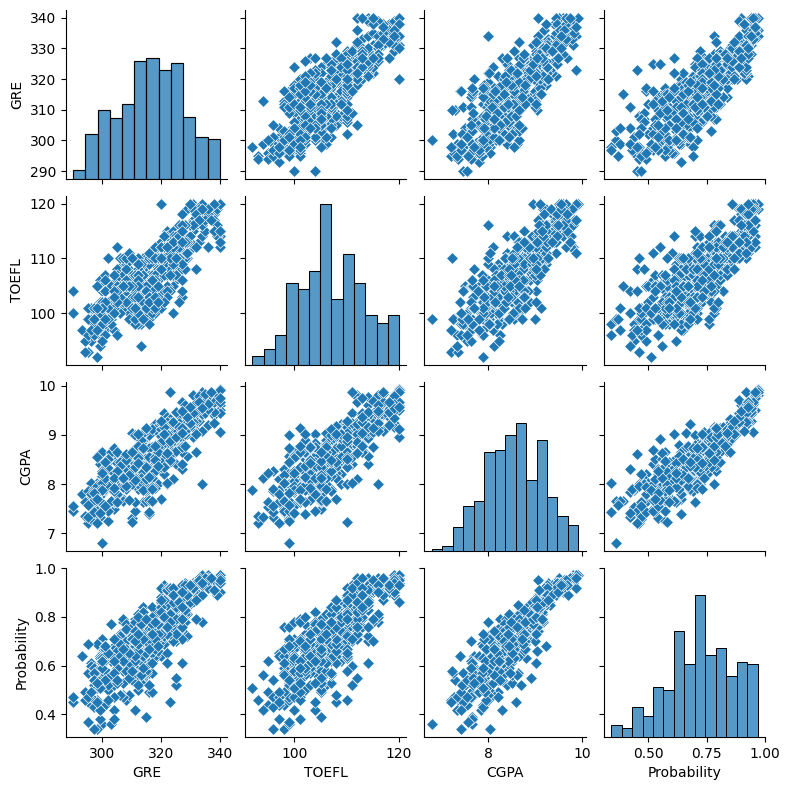

In [5]:
# ISSUE 4 : Use seaborn.pairplot() to visualize relationships between numerical features like GRE Score, TOEFL Score, CGPA, and Chance of Admit.
import matplotlib.pyplot as plt
import seaborn as sns

columns = ["GRE", "TOEFL", "CGPA", "Probability"]  # Selecting relevant columns
graph = sns.pairplot(df[columns], markers="D", height=2)  # Create pairplot
plt.show()


In [ ]:
# ISSUE 5: Identify and impute missing values in the dataset using mean, median, or mode. Missing value columns include GRE Score, TOEFL Score, or CGPA (if present).

#observation: no null values

#imputing gre score:
df.fillna({'GRE':df['GRE'].mean()}, inplace=True)

#imputing toefl score:
df.fillna({'TOEFL':df['TOEFL'].median()}, inplace=True)

#imputing cgpa:
df.fillna({'CGPA':df['CGPA'].median()}, inplace=True)

In [ ]:
# ISSUE 6 : Normalize numerical features (GRE Score, TOEFL Score, CGPA) using MinMaxScaler to improve consistency and model performance.

In [ ]:
# Splitting the dataset in features and label
X = df.drop('Probability', axis='columns')
y = df['Probability']

In [ ]:
df.head()

,Serial No.,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Probability
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Splitting the dataset into train and test samples
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)
print(len(X_train), len(X_test))

400 100


In [ ]:
# Creating Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8154388114431523

In [ ]:
# ISSUE 7:Apply Decision Tree Model

In [ ]:
# ISSUE 8: Use the feature_importances_ attribute of the DecisionTreeClassifier to find the most important features. Visualize the importance using a bar chart.

In [ ]:
 #ISSUE 9: Train RandomForestClassifier and compare its accuracy with the DecisionTreeClassifier.

In [ ]:
# ISSUE 10: Add a scatter plot comparing predictions with actual values.